In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df=pd.read_csv('/content/drive/MyDrive/CSV files/axis_day_data.csv')
df.head()

Mounted at /content/drive


,Unnamed: 0,date,open,high,low,close,volume
0,0,2014-01-01 00:00:00+05:30,260.30,261.00,257.64,258.44,2849424
1,1,2014-01-02 00:00:00+05:30,258.40,265.00,252.67,254.46,12972059
2,2,2014-01-03 00:00:00+05:30,251.60,253.90,249.12,252.18,12018739
3,3,2014-01-06 00:00:00+05:30,251.51,252.40,248.32,251.26,9181444
4,4,2014-01-07 00:00:00+05:30,251.50,253.16,243.10,246.85,15100309


In [ ]:
from datetime import datetime
mean_data=df.iloc[:,2:4].mean(axis=1)
df['mean_data']=mean_data
dataset=df[['date','mean_data']]
#Removed time from date
dataset['date']=pd.to_datetime(dataset['date'])
dataset['date'] = dataset['date'].dt.date
dataset.set_index('date', inplace=True)

<ipython-input-5-aca97c8acad7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['date']=pd.to_datetime(dataset['date'])
<ipython-input-5-aca97c8acad7>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['date'] = dataset['date'].dt.date


In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt

# Split the dataset
train = dataset.iloc[:-10]
test = dataset.iloc[-10:]

# Scale the data
scaler = MinMaxScaler()
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

# Define the time series generator
from keras.preprocessing.sequence import TimeseriesGenerator
n_input = 5  # Increased the input sequence length
n_features = 1
train_generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=16)

# Build the model
model = Sequential()
model.add(LSTM(units=100, activation='tanh', return_sequences=True, input_shape=(n_input, n_features)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(train_generator, epochs=200, verbose=1)

# Test data generator
test_generator = TimeseriesGenerator(scaled_test, scaled_test, length=n_input, batch_size=1)

# Prepare test data for prediction
xlist, ylist = np.empty((0, n_input, n_features)), np.empty((0, 1))
for i in range(len(test_generator)):
    X, y = test_generator[i]
    xlist = np.vstack([xlist, X])
    ylist = np.vstack([ylist, y])

# Predict
ypred = model.predict(xlist)

# Inverse transform the predictions and actual values
true_predictions = scaler.inverse_transform(ypred)
ylist = scaler.inverse_transform(ylist)


Epoch 1/200
153/153 [==============================] - 6s 10ms/step - loss: 0.0204
Epoch 2/200
153/153 [==============================] - 2s 11ms/step - loss: 0.0025
Epoch 3/200
153/153 [==============================] - 2s 11ms/step - loss: 0.0033
Epoch 4/200
153/153 [==============================] - 2s 14ms/step - loss: 0.0022
Epoch 5/200
153/153 [==============================] - 2s 11ms/step - loss: 0.0023
Epoch 6/200
153/153 [==============================] - 1s 8ms/step - loss: 0.0020
Epoch 7/200
153/153 [==============================] - 1s 9ms/step - loss: 0.0021
Epoch 8/200
153/153 [==============================] - 1s 9ms/step - loss: 0.0021
Epoch 9/200
153/153 [==============================] - 1s 9ms/step - loss: 0.0021
Epoch 10/200
153/153 [==============================] - 1s 9ms/step - loss: 0.0019
Epoch 11/200
153/153 [==============================] - 2s 10ms/step - loss: 0.0020
Epoch 12/200
153/153 [==============================] - 2s 14ms/step - loss: 0.0016
Epoch 

In [ ]:
print('new data frame ')
forecast_values=true_predictions.tolist()
y_test_values=ylist.tolist()
print(forecast_values)
print(y_test_values)
df=pd.DataFrame({'Iteration':1,'Actual_values': y_test_values, 'Predictions': forecast_values})
df['Iteration'] = ['1'] + [''] * (len(df) - 1)
df['Actual_values'] = df['Actual_values'].apply(lambda x: x[0])
df['Predictions'] = df['Predictions'].apply(lambda x: x[0])
df.head()

new data frame 
[[1128.95166015625], [1140.896484375], [1159.257080078125], [1181.6063232421875], [1178.561767578125]]
[[1135.675], [1147.15], [1171.525], [1165.0], [1157.075]]


,Iteration,Actual_values,Predictions
0,1,1135.675,1128.951660
1,,1147.150,1140.896484
2,,1171.525,1159.257080
3,,1165.000,1181.606323
4,,1157.075,1178.561768


In [ ]:
# prompt: Using dataframe df: can you make the above code to short lines

df.head(2)


,Iteration,Actual_values,Predictions
0,1,1135.675,1128.951660
1,,1147.150,1140.896484


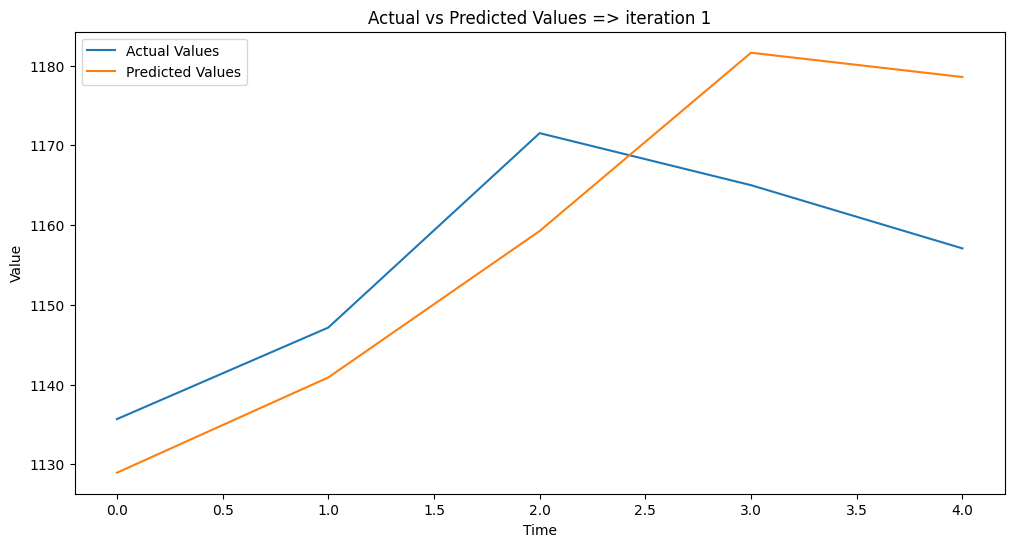

In [ ]:
# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(ylist, label='Actual Values')
plt.plot(true_predictions, label='Predicted Values')
plt.title('Actual vs Predicted Values => iteration 1')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt

# Split the dataset
train = dataset.iloc[:-20]
test = dataset.iloc[-20:-10]

# Scale the data
scaler = MinMaxScaler()
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

# Define the time series generator
from keras.preprocessing.sequence import TimeseriesGenerator
n_input = 5  # Increased the input sequence length
n_features = 1
train_generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=16)

# Build the model
model = Sequential()
model.add(LSTM(units=100, activation='tanh', return_sequences=True, input_shape=(n_input, n_features)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(train_generator, epochs=200, verbose=1)

# Test data generator
test_generator = TimeseriesGenerator(scaled_test, scaled_test, length=n_input, batch_size=1)

# Prepare test data for prediction
xlist, ylist = np.empty((0, n_input, n_features)), np.empty((0, 1))
for i in range(len(test_generator)):
    X, y = test_generator[i]
    xlist = np.vstack([xlist, X])
    ylist = np.vstack([ylist, y])

# Predict
ypred = model.predict(xlist)

# Inverse transform the predictions and actual values
true_predictions = scaler.inverse_transform(ypred)
ylist = scaler.inverse_transform(ylist)


Epoch 1/200
152/152 [==============================] - 7s 10ms/step - loss: 0.0106
Epoch 2/200
152/152 [==============================] - 2s 10ms/step - loss: 0.0025
Epoch 3/200
152/152 [==============================] - 2s 13ms/step - loss: 0.0022
Epoch 4/200
152/152 [==============================] - 2s 10ms/step - loss: 0.0021
Epoch 5/200
152/152 [==============================] - 2s 10ms/step - loss: 0.0024
Epoch 6/200
152/152 [==============================] - 2s 14ms/step - loss: 0.0018
Epoch 7/200
152/152 [==============================] - 2s 15ms/step - loss: 0.0021
Epoch 8/200
152/152 [==============================] - 2s 12ms/step - loss: 0.0025
Epoch 9/200
152/152 [==============================] - 2s 10ms/step - loss: 0.0018
Epoch 10/200
152/152 [==============================] - 2s 10ms/step - loss: 0.0016
Epoch 11/200
152/152 [==============================] - 2s 10ms/step - loss: 0.0017
Epoch 12/200
152/152 [==============================] - 2s 10ms/step - loss: 0.0014
E

In [ ]:
print('new data frame ')
new_data={'Actual_values':ylist.tolist(),'Predictions':true_predictions.tolist()}
new_rows = pd.DataFrame(new_data)
df=pd.concat([df,new_rows],ignore_index=True)
df['Actual_values'] = df['Actual_values'].apply(lambda x: x[0] if isinstance(x, list) else x)
df['Predictions'] = df['Predictions'].apply(lambda x: x[0] if isinstance(x, list) else x)
df

new data frame 


,Iteration,Actual_values,Predictions
0,1,1135.675,1128.951660
1,,1147.150,1140.896484
2,,1171.525,1159.257080
3,,1165.000,1181.606323
4,,1157.075,1178.561768
5,NaN,1089.600,1080.514404
6,NaN,1087.950,1082.257812
7,NaN,1067.050,1083.662109
8,NaN,1053.900,1066.153076
9,NaN,1047.775,1058.425415


In [ ]:
# prompt: Using dataframe df: i want the values in form of values instead of list

df['Actual_values'] = df['Actual_values'].apply(lambda x: x[0] if isinstance(x, list) else x)
df['Predictions'] = df['Predictions'].apply(lambda x: x[0] if isinstance(x, list) else x)


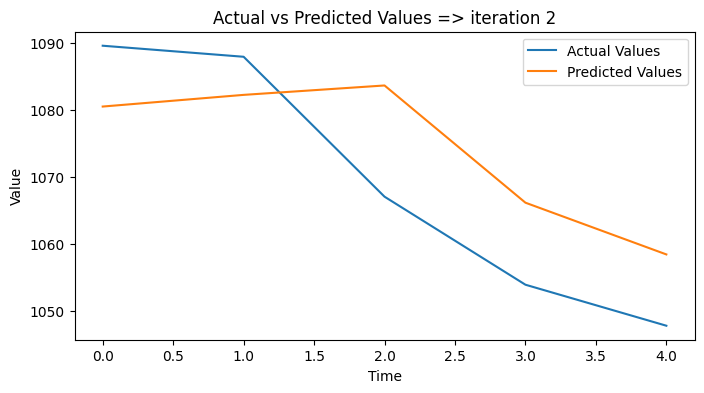

In [ ]:
# Plot the results
plt.figure(figsize=(8,4))
plt.plot(ylist, label='Actual Values')
plt.plot(true_predictions, label='Predicted Values')
plt.title('Actual vs Predicted Values => iteration 2')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
# Calculate MSE
mse = mean_squared_error(ylist, true_predictions)
print(f'Mean Squared Error: {mse}')

# Calculate MAE
mae = mean_absolute_error(ylist, true_predictions)
print(f'Mean Absolute Error: {mae}')

Mean Squared Error: 130.89608837616368
Mean Absolute Error: 10.858676757812464


In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt

# Split the dataset
train = dataset.iloc[:-20]
test = dataset.iloc[-20:-10]

# Scale the data
scaler = MinMaxScaler()
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

# Define the time series generator
from keras.preprocessing.sequence import TimeseriesGenerator
n_input = 5  # Increased the input sequence length
n_features = 1
train_generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=16)

# Build the model
model = Sequential()
model.add(LSTM(units=100, activation='tanh', return_sequences=True, input_shape=(n_input, n_features)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(train_generator, epochs=200, verbose=1)

# Test data generator
test_generator = TimeseriesGenerator(scaled_test, scaled_test, length=n_input, batch_size=1)

# Prepare test data for prediction
xlist, ylist = np.empty((0, n_input, n_features)), np.empty((0, 1))
for i in range(len(test_generator)):
    X, y = test_generator[i]
    xlist = np.vstack([xlist, X])
    ylist = np.vstack([ylist, y])

# Predict
ypred = model.predict(xlist)

# Inverse transform the predictions and actual values
true_predictions = scaler.inverse_transform(ypred)
ylist = scaler.inverse_transform(ylist)


Epoch 1/200
152/152 [==============================] - 6s 10ms/step - loss: 0.0176
Epoch 2/200
152/152 [==============================] - 1s 8ms/step - loss: 0.0027
Epoch 3/200
152/152 [==============================] - 1s 8ms/step - loss: 0.0022
Epoch 4/200
152/152 [==============================] - 1s 9ms/step - loss: 0.0021
Epoch 5/200
152/152 [==============================] - 1s 9ms/step - loss: 0.0020
Epoch 6/200
152/152 [==============================] - 1s 8ms/step - loss: 0.0023
Epoch 7/200
152/152 [==============================] - 1s 9ms/step - loss: 0.0022
Epoch 8/200
152/152 [==============================] - 2s 13ms/step - loss: 0.0020
Epoch 9/200
152/152 [==============================] - 2s 13ms/step - loss: 0.0022
Epoch 10/200
152/152 [==============================] - 1s 9ms/step - loss: 0.0017
Epoch 11/200
152/152 [==============================] - 1s 8ms/step - loss: 0.0015
Epoch 12/200
152/152 [==============================] - 1s 9ms/step - loss: 0.0015
Epoch 13/2

In [ ]:
print('new data frame ')
new_data={'Actual_values':ylist.tolist(),'Predictions':true_predictions.tolist()}
new_rows = pd.DataFrame(new_data)
df=pd.concat([df,new_rows],ignore_index=True)
df['Actual_values'] = df['Actual_values'].apply(lambda x: x[0] if isinstance(x, list) else x)
df['Predictions'] = df['Predictions'].apply(lambda x: x[0] if isinstance(x, list) else x)
df

new data frame 


,Iteration,Actual_values,Predictions
0,1,1135.675,1128.951660
1,,1147.150,1140.896484
2,,1171.525,1159.257080
3,,1165.000,1181.606323
4,,1157.075,1178.561768
5,NaN,1089.600,1080.514404
6,NaN,1087.950,1082.257812
7,NaN,1067.050,1083.662109
8,NaN,1053.900,1066.153076
9,NaN,1047.775,1058.425415


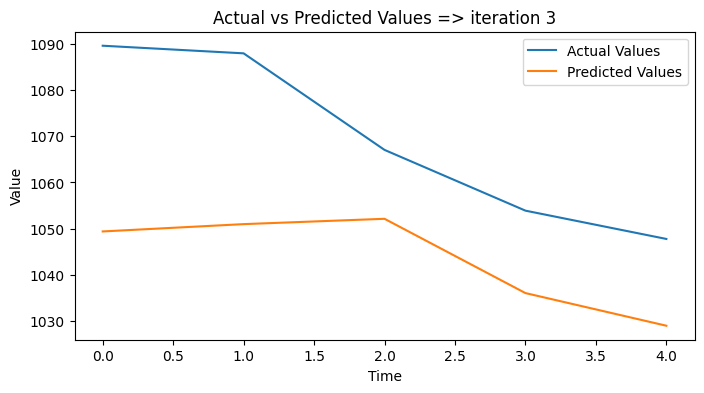

In [ ]:
# Plot the results
plt.figure(figsize=(8,4))
plt.plot(ylist, label='Actual Values')
plt.plot(true_predictions, label='Predicted Values')
plt.title('Actual vs Predicted Values => iteration 3')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
# Calculate MSE
mse = mean_squared_error(ylist, true_predictions)
print(f'Mean Squared Error: {mse}')

# Calculate MAE
mae = mean_absolute_error(ylist, true_predictions)
print(f'Mean Absolute Error: {mae}')


Mean Squared Error: 775.1958070058824
Mean Absolute Error: 25.74044921875002


In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt

# Split the dataset
train = dataset.iloc[:-30]
test = dataset.iloc[-30:-20]

# Scale the data
scaler = MinMaxScaler()
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

# Define the time series generator
from keras.preprocessing.sequence import TimeseriesGenerator
n_input = 5  # Increased the input sequence length
n_features = 1
train_generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=16)

# Build the model
model = Sequential()
model.add(LSTM(units=100, activation='tanh', return_sequences=True, input_shape=(n_input, n_features)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(train_generator, epochs=200, verbose=1)

# Test data generator
test_generator = TimeseriesGenerator(scaled_test, scaled_test, length=n_input, batch_size=1)

# Prepare test data for prediction
xlist, ylist = np.empty((0, n_input, n_features)), np.empty((0, 1))
for i in range(len(test_generator)):
    X, y = test_generator[i]
    xlist = np.vstack([xlist, X])
    ylist = np.vstack([ylist, y])

# Predict
ypred = model.predict(xlist)

# Inverse transform the predictions and actual values
true_predictions = scaler.inverse_transform(ypred)
ylist = scaler.inverse_transform(ylist)


Epoch 1/200
151/151 [==============================] - 5s 10ms/step - loss: 0.0181
Epoch 2/200
151/151 [==============================] - 2s 12ms/step - loss: 0.0026
Epoch 3/200
151/151 [==============================] - 2s 14ms/step - loss: 0.0027
Epoch 4/200
151/151 [==============================] - 2s 14ms/step - loss: 0.0023
Epoch 5/200
151/151 [==============================] - 1s 9ms/step - loss: 0.0020
Epoch 6/200
151/151 [==============================] - 1s 9ms/step - loss: 0.0020
Epoch 7/200
151/151 [==============================] - 1s 10ms/step - loss: 0.0023
Epoch 8/200
151/151 [==============================] - 1s 9ms/step - loss: 0.0019
Epoch 9/200
151/151 [==============================] - 1s 10ms/step - loss: 0.0020
Epoch 10/200
151/151 [==============================] - 2s 11ms/step - loss: 0.0020
Epoch 11/200
151/151 [==============================] - 3s 16ms/step - loss: 0.0016
Epoch 12/200
151/151 [==============================] - 2s 16ms/step - loss: 0.0017
Epoc

In [ ]:
print('new data frame ')
new_data={'Actual_values':ylist.tolist(),'Predictions':true_predictions.tolist()}
new_rows = pd.DataFrame(new_data)
df=pd.concat([df,new_rows],ignore_index=True)
df['Actual_values'] = df['Actual_values'].apply(lambda x: x[0] if isinstance(x, list) else x)
df['Predictions'] = df['Predictions'].apply(lambda x: x[0] if isinstance(x, list) else x)
df

new data frame 


,Iteration,Actual_values,Predictions
0,1,1135.675,1128.951660
1,,1147.150,1140.896484
2,,1171.525,1159.257080
3,,1165.000,1181.606323
4,,1157.075,1178.561768
5,NaN,1089.600,1080.514404
6,NaN,1087.950,1082.257812
7,NaN,1067.050,1083.662109
8,NaN,1053.900,1066.153076
9,NaN,1047.775,1058.425415


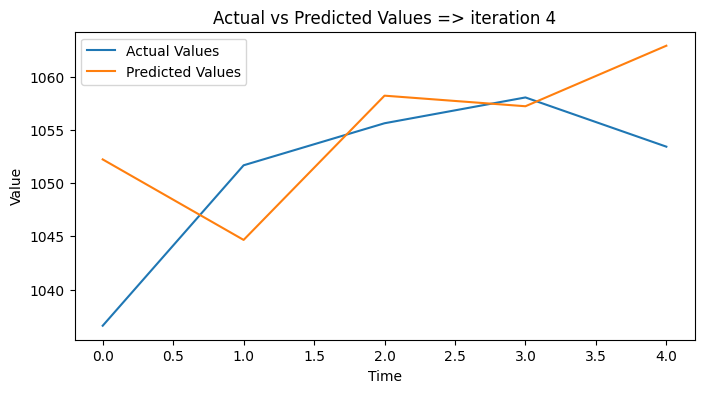

In [ ]:
# Plot the results
plt.figure(figsize=(8,4))
plt.plot(ylist, label='Actual Values')
plt.plot(true_predictions, label='Predicted Values')
plt.title('Actual vs Predicted Values => iteration 4')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
# Calculate MSE
mse = mean_squared_error(ylist, true_predictions)
print(f'Mean Squared Error: {mse}')

# Calculate MAE
mae = mean_absolute_error(ylist, true_predictions)
print(f'Mean Absolute Error: {mae}')


Mean Squared Error: 78.1511523387438
Mean Absolute Error: 7.1087500000000095


In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt

# Split the dataset
train = dataset.iloc[:-40]
test = dataset.iloc[-40:-30]

# Scale the data
scaler = MinMaxScaler()
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

# Define the time series generator
from keras.preprocessing.sequence import TimeseriesGenerator
n_input = 5  # Increased the input sequence length
n_features = 1
train_generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=16)

# Build the model
model = Sequential()
model.add(LSTM(units=100, activation='tanh', return_sequences=True, input_shape=(n_input, n_features)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(train_generator, epochs=200, verbose=1)

# Test data generator
test_generator = TimeseriesGenerator(scaled_test, scaled_test, length=n_input, batch_size=1)

# Prepare test data for prediction
xlist, ylist = np.empty((0, n_input, n_features)), np.empty((0, 1))
for i in range(len(test_generator)):
    X, y = test_generator[i]
    xlist = np.vstack([xlist, X])
    ylist = np.vstack([ylist, y])

# Predict
ypred = model.predict(xlist)

# Inverse transform the predictions and actual values
true_predictions = scaler.inverse_transform(ypred)
ylist = scaler.inverse_transform(ylist)


Epoch 1/200
151/151 [==============================] - 6s 8ms/step - loss: 0.0185
Epoch 2/200
151/151 [==============================] - 1s 9ms/step - loss: 0.0026
Epoch 3/200
151/151 [==============================] - 1s 9ms/step - loss: 0.0028
Epoch 4/200
151/151 [==============================] - 1s 8ms/step - loss: 0.0020
Epoch 5/200
151/151 [==============================] - 1s 9ms/step - loss: 0.0021
Epoch 6/200
151/151 [==============================] - 2s 13ms/step - loss: 0.0020
Epoch 7/200
151/151 [==============================] - 1s 9ms/step - loss: 0.0017
Epoch 8/200
151/151 [==============================] - 1s 9ms/step - loss: 0.0020
Epoch 9/200
151/151 [==============================] - 1s 9ms/step - loss: 0.0018
Epoch 10/200
151/151 [==============================] - 1s 9ms/step - loss: 0.0017
Epoch 11/200
151/151 [==============================] - 1s 8ms/step - loss: 0.0017
Epoch 12/200
151/151 [==============================] - 1s 9ms/step - loss: 0.0020
Epoch 13/200

1/1 [==============================] - 1s 846ms/step


In [ ]:
print('new data frame ')
new_data={'Actual_values':ylist.tolist(),'Predictions':true_predictions.tolist()}
new_rows = pd.DataFrame(new_data)
df=pd.concat([df,new_rows],ignore_index=True)
df['Actual_values'] = df['Actual_values'].apply(lambda x: x[0] if isinstance(x, list) else x)
df['Predictions'] = df['Predictions'].apply(lambda x: x[0] if isinstance(x, list) else x)
df

new data frame 


,Iteration,Actual_values,Predictions
0,1,1135.675,1128.951660
1,,1147.150,1140.896484
2,,1171.525,1159.257080
3,,1165.000,1181.606323
4,,1157.075,1178.561768
5,NaN,1089.600,1080.514404
6,NaN,1087.950,1082.257812
7,NaN,1067.050,1083.662109
8,NaN,1053.900,1066.153076
9,NaN,1047.775,1058.425415


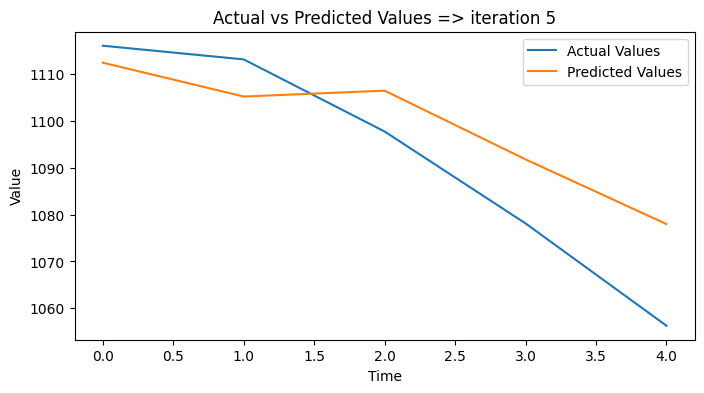

In [ ]:
# Plot the results
plt.figure(figsize=(8,4))
plt.plot(ylist, label='Actual Values')
plt.plot(true_predictions, label='Predicted Values')
plt.title('Actual vs Predicted Values => iteration 5')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
# Calculate MSE
mse = mean_squared_error(ylist, true_predictions)
print(f'Mean Squared Error: {mse}')

# Calculate MAE
mae = mean_absolute_error(ylist, true_predictions)
print(f'Mean Absolute Error: {mae}')


Mean Squared Error: 162.51432923495753
Mean Absolute Error: 11.147817382812491


In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt

# Split the dataset
train = dataset.iloc[:-50]
test = dataset.iloc[-50:-40]

# Scale the data
scaler = MinMaxScaler()
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

# Define the time series generator
from keras.preprocessing.sequence import TimeseriesGenerator
n_input = 5  # Increased the input sequence length
n_features = 1
train_generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=16)

# Build the model
model = Sequential()
model.add(LSTM(units=100, activation='tanh', return_sequences=True, input_shape=(n_input, n_features)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(train_generator, epochs=200, verbose=1)

# Test data generator
test_generator = TimeseriesGenerator(scaled_test, scaled_test, length=n_input, batch_size=1)

# Prepare test data for prediction
xlist, ylist = np.empty((0, n_input, n_features)), np.empty((0, 1))
for i in range(len(test_generator)):
    X, y = test_generator[i]
    xlist = np.vstack([xlist, X])
    ylist = np.vstack([ylist, y])

# Predict
ypred = model.predict(xlist)

# Inverse transform the predictions and actual values
true_predictions = scaler.inverse_transform(ypred)
ylist = scaler.inverse_transform(ylist)


Epoch 1/200
150/150 [==============================] - 5s 9ms/step - loss: 0.0138
Epoch 2/200
150/150 [==============================] - 1s 10ms/step - loss: 0.0029
Epoch 3/200
150/150 [==============================] - 1s 9ms/step - loss: 0.0026
Epoch 4/200
150/150 [==============================] - 2s 13ms/step - loss: 0.0020
Epoch 5/200
150/150 [==============================] - 2s 15ms/step - loss: 0.0024
Epoch 6/200
150/150 [==============================] - 2s 10ms/step - loss: 0.0018
Epoch 7/200
150/150 [==============================] - 1s 9ms/step - loss: 0.0019
Epoch 8/200
150/150 [==============================] - 1s 9ms/step - loss: 0.0019
Epoch 9/200
150/150 [==============================] - 1s 10ms/step - loss: 0.0019
Epoch 10/200
150/150 [==============================] - 1s 9ms/step - loss: 0.0022
Epoch 11/200
150/150 [==============================] - 1s 10ms/step - loss: 0.0015
Epoch 12/200
150/150 [==============================] - 2s 11ms/step - loss: 0.0016
Epoch 

1/1 [==============================] - 1s 1s/step


In [ ]:
print('new data frame ')
new_data={'Actual_values':ylist.tolist(),'Predictions':true_predictions.tolist()}
new_rows = pd.DataFrame(new_data)
df=pd.concat([df,new_rows],ignore_index=True)
df['Actual_values'] = df['Actual_values'].apply(lambda x: x[0] if isinstance(x, list) else x)
df['Predictions'] = df['Predictions'].apply(lambda x: x[0] if isinstance(x, list) else x)
df

new data frame 


,Iteration,Actual_values,Predictions
0,1,1135.675,1128.951660
1,,1147.150,1140.896484
2,,1171.525,1159.257080
3,,1165.000,1181.606323
4,,1157.075,1178.561768
5,NaN,1089.600,1080.514404
6,NaN,1087.950,1082.257812
7,NaN,1067.050,1083.662109
8,NaN,1053.900,1066.153076
9,NaN,1047.775,1058.425415


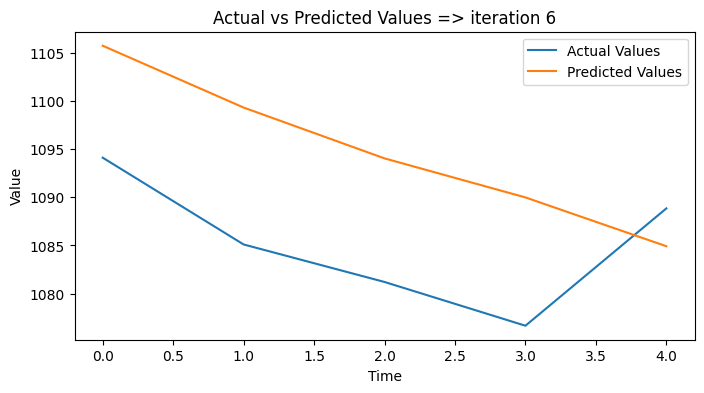

In [ ]:
# Plot the results
plt.figure(figsize=(8,4))
plt.plot(ylist, label='Actual Values')
plt.plot(true_predictions, label='Predicted Values')
plt.title('Actual vs Predicted Values => iteration 6')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
# Calculate MSE
mse = mean_squared_error(ylist, true_predictions)
print(f'Mean Squared Error: {mse}')

# Calculate MAE
mae = mean_absolute_error(ylist, true_predictions)
print(f'Mean Absolute Error: {mae}')


Mean Squared Error: 139.38384273374047
Mean Absolute Error: 11.201362304687473


In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt

# Split the dataset
train = dataset.iloc[:-60]
test = dataset.iloc[-60:-50]

# Scale the data
scaler = MinMaxScaler()
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

# Define the time series generator
from keras.preprocessing.sequence import TimeseriesGenerator
n_input = 5  # Increased the input sequence length
n_features = 1
train_generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=16)

# Build the model
model = Sequential()
model.add(LSTM(units=100, activation='tanh', return_sequences=True, input_shape=(n_input, n_features)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(train_generator, epochs=200, verbose=1)

# Test data generator
test_generator = TimeseriesGenerator(scaled_test, scaled_test, length=n_input, batch_size=1)

# Prepare test data for prediction
xlist, ylist = np.empty((0, n_input, n_features)), np.empty((0, 1))
for i in range(len(test_generator)):
    X, y = test_generator[i]
    xlist = np.vstack([xlist, X])
    ylist = np.vstack([ylist, y])

# Predict
ypred = model.predict(xlist)

# Inverse transform the predictions and actual values
true_predictions = scaler.inverse_transform(ypred)
ylist = scaler.inverse_transform(ylist)


Epoch 1/200
150/150 [==============================] - 6s 10ms/step - loss: 0.0140
Epoch 2/200
150/150 [==============================] - 1s 10ms/step - loss: 0.0026
Epoch 3/200
150/150 [==============================] - 1s 10ms/step - loss: 0.0023
Epoch 4/200
150/150 [==============================] - 1s 10ms/step - loss: 0.0031
Epoch 5/200
150/150 [==============================] - 2s 13ms/step - loss: 0.0020
Epoch 6/200
150/150 [==============================] - 2s 15ms/step - loss: 0.0024
Epoch 7/200
150/150 [==============================] - 1s 10ms/step - loss: 0.0019
Epoch 8/200
150/150 [==============================] - 1s 9ms/step - loss: 0.0020
Epoch 9/200
150/150 [==============================] - 1s 9ms/step - loss: 0.0020
Epoch 10/200
150/150 [==============================] - 1s 9ms/step - loss: 0.0017
Epoch 11/200
150/150 [==============================] - 1s 9ms/step - loss: 0.0018
Epoch 12/200
150/150 [==============================] - 1s 9ms/step - loss: 0.0016
Epoch 

In [ ]:
print('new data frame ')
new_data={'Actual_values':ylist.tolist(),'Predictions':true_predictions.tolist()}
new_rows = pd.DataFrame(new_data)
df=pd.concat([df,new_rows],ignore_index=True)
df['Actual_values'] = df['Actual_values'].apply(lambda x: x[0] if isinstance(x, list) else x)
df['Predictions'] = df['Predictions'].apply(lambda x: x[0] if isinstance(x, list) else x)
df

new data frame 


,Iteration,Actual_values,Predictions
0,1,1135.675,1128.951660
1,,1147.150,1140.896484
2,,1171.525,1159.257080
3,,1165.000,1181.606323
4,,1157.075,1178.561768
5,NaN,1089.600,1080.514404
6,NaN,1087.950,1082.257812
7,NaN,1067.050,1083.662109
8,NaN,1053.900,1066.153076
9,NaN,1047.775,1058.425415


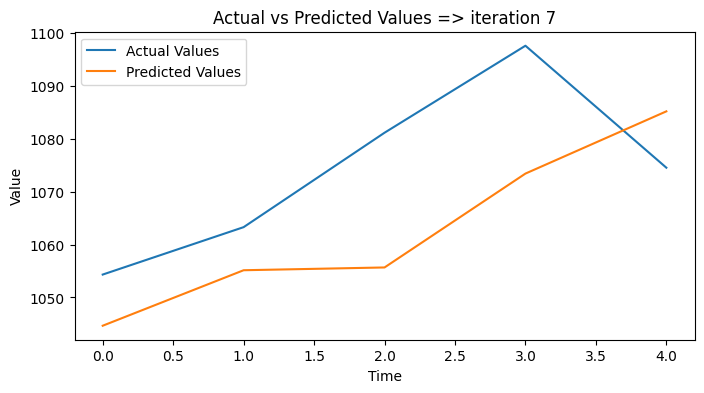

In [ ]:
# Plot the results
plt.figure(figsize=(8,4))
plt.plot(ylist, label='Actual Values')
plt.plot(true_predictions, label='Predicted Values')
plt.title('Actual vs Predicted Values => iteration 7')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
# Calculate MSE
mse = mean_squared_error(ylist, true_predictions)
print(f'Mean Squared Error: {mse}')

# Calculate MAE
mae = mean_absolute_error(ylist, true_predictions)
print(f'Mean Absolute Error: {mae}')


Mean Squared Error: 300.40371732854885
Mean Absolute Error: 15.599492187500028


In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt

# Split the dataset
train = dataset.iloc[:-70]
test = dataset.iloc[-70:-60]

# Scale the data
scaler = MinMaxScaler()
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

# Define the time series generator
from keras.preprocessing.sequence import TimeseriesGenerator
n_input = 5  # Increased the input sequence length
n_features = 1
train_generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=16)

# Build the model
model = Sequential()
model.add(LSTM(units=100, activation='tanh', return_sequences=True, input_shape=(n_input, n_features)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(train_generator, epochs=200, verbose=1)

# Test data generator
test_generator = TimeseriesGenerator(scaled_test, scaled_test, length=n_input, batch_size=1)

# Prepare test data for prediction
xlist, ylist = np.empty((0, n_input, n_features)), np.empty((0, 1))
for i in range(len(test_generator)):
    X, y = test_generator[i]
    xlist = np.vstack([xlist, X])
    ylist = np.vstack([ylist, y])

# Predict
ypred = model.predict(xlist)

# Inverse transform the predictions and actual values
true_predictions = scaler.inverse_transform(ypred)
ylist = scaler.inverse_transform(ylist)


Epoch 1/200
149/149 [==============================] - 6s 10ms/step - loss: 0.0153
Epoch 2/200
149/149 [==============================] - 2s 16ms/step - loss: 0.0027
Epoch 3/200
149/149 [==============================] - 2s 12ms/step - loss: 0.0023
Epoch 4/200
149/149 [==============================] - 2s 10ms/step - loss: 0.0025
Epoch 5/200
149/149 [==============================] - 1s 10ms/step - loss: 0.0022
Epoch 6/200
149/149 [==============================] - 1s 10ms/step - loss: 0.0023
Epoch 7/200
149/149 [==============================] - 1s 10ms/step - loss: 0.0022
Epoch 8/200
149/149 [==============================] - 1s 10ms/step - loss: 0.0019
Epoch 9/200
149/149 [==============================] - 2s 14ms/step - loss: 0.0028
Epoch 10/200
149/149 [==============================] - 2s 14ms/step - loss: 0.0017
Epoch 11/200
149/149 [==============================] - 1s 9ms/step - loss: 0.0016
Epoch 12/200
149/149 [==============================] - 1s 9ms/step - loss: 0.0015
Epo

In [ ]:
print('new data frame ')
new_data={'Actual_values':ylist.tolist(),'Predictions':true_predictions.tolist()}
new_rows = pd.DataFrame(new_data)
df=pd.concat([df,new_rows],ignore_index=True)
df['Actual_values'] = df['Actual_values'].apply(lambda x: x[0] if isinstance(x, list) else x)
df['Predictions'] = df['Predictions'].apply(lambda x: x[0] if isinstance(x, list) else x)
df

new data frame 


,Iteration,Actual_values,Predictions
0,1,1135.675,1128.951660
1,,1147.150,1140.896484
2,,1171.525,1159.257080
3,,1165.000,1181.606323
4,,1157.075,1178.561768
5,NaN,1089.600,1080.514404
6,NaN,1087.950,1082.257812
7,NaN,1067.050,1083.662109
8,NaN,1053.900,1066.153076
9,NaN,1047.775,1058.425415


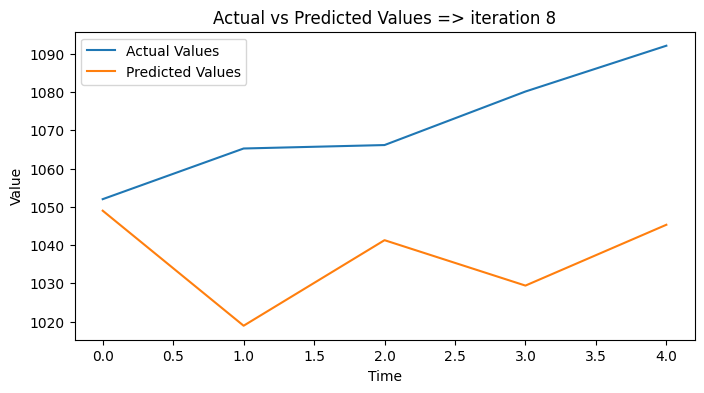

In [ ]:
# Plot the results
plt.figure(figsize=(8,4))
plt.plot(ylist, label='Actual Values')
plt.plot(true_predictions, label='Predicted Values')
plt.title('Actual vs Predicted Values => iteration 8')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
# Calculate MSE
mse = mean_squared_error(ylist, true_predictions)
print(f'Mean Squared Error: {mse}')

# Calculate MAE
mae = mean_absolute_error(ylist, true_predictions)
print(f'Mean Absolute Error: {mae}')


Mean Squared Error: 1508.6630225845602
Mean Absolute Error: 34.360756835937536


In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt

# Split the dataset
train = dataset.iloc[:-80]
test = dataset.iloc[-80:-70]

# Scale the data
scaler = MinMaxScaler()
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

# Define the time series generator
from keras.preprocessing.sequence import TimeseriesGenerator
n_input = 5  # Increased the input sequence length
n_features = 1
train_generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=16)

# Build the model
model = Sequential()
model.add(LSTM(units=100, activation='tanh', return_sequences=True, input_shape=(n_input, n_features)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(train_generator, epochs=200, verbose=1)

# Test data generator
test_generator = TimeseriesGenerator(scaled_test, scaled_test, length=n_input, batch_size=1)

# Prepare test data for prediction
xlist, ylist = np.empty((0, n_input, n_features)), np.empty((0, 1))
for i in range(len(test_generator)):
    X, y = test_generator[i]
    xlist = np.vstack([xlist, X])
    ylist = np.vstack([ylist, y])

# Predict
ypred = model.predict(xlist)

# Inverse transform the predictions and actual values
true_predictions = scaler.inverse_transform(ypred)
ylist = scaler.inverse_transform(ylist)


Epoch 1/200
148/148 [==============================] - 6s 9ms/step - loss: 0.0113
Epoch 2/200
148/148 [==============================] - 1s 9ms/step - loss: 0.0027
Epoch 3/200
148/148 [==============================] - 1s 9ms/step - loss: 0.0023
Epoch 4/200
148/148 [==============================] - 1s 8ms/step - loss: 0.0022
Epoch 5/200
148/148 [==============================] - 1s 9ms/step - loss: 0.0020
Epoch 6/200
148/148 [==============================] - 1s 9ms/step - loss: 0.0021
Epoch 7/200
148/148 [==============================] - 2s 13ms/step - loss: 0.0018
Epoch 8/200
148/148 [==============================] - 2s 13ms/step - loss: 0.0019
Epoch 9/200
148/148 [==============================] - 2s 15ms/step - loss: 0.0016
Epoch 10/200
148/148 [==============================] - 2s 14ms/step - loss: 0.0016
Epoch 11/200
148/148 [==============================] - 1s 9ms/step - loss: 0.0018
Epoch 12/200
148/148 [==============================] - 1s 9ms/step - loss: 0.0015
Epoch 13/

In [ ]:
print('new data frame ')
new_data={'Actual_values':ylist.tolist(),'Predictions':true_predictions.tolist()}
new_rows = pd.DataFrame(new_data)
df=pd.concat([df,new_rows],ignore_index=True)
df['Actual_values'] = df['Actual_values'].apply(lambda x: x[0] if isinstance(x, list) else x)
df['Predictions'] = df['Predictions'].apply(lambda x: x[0] if isinstance(x, list) else x)
df

new data frame 


,Iteration,Actual_values,Predictions
0,1,1135.675,1128.951660
1,,1147.150,1140.896484
2,,1171.525,1159.257080
3,,1165.000,1181.606323
4,,1157.075,1178.561768
5,NaN,1089.600,1080.514404
6,NaN,1087.950,1082.257812
7,NaN,1067.050,1083.662109
8,NaN,1053.900,1066.153076
9,NaN,1047.775,1058.425415


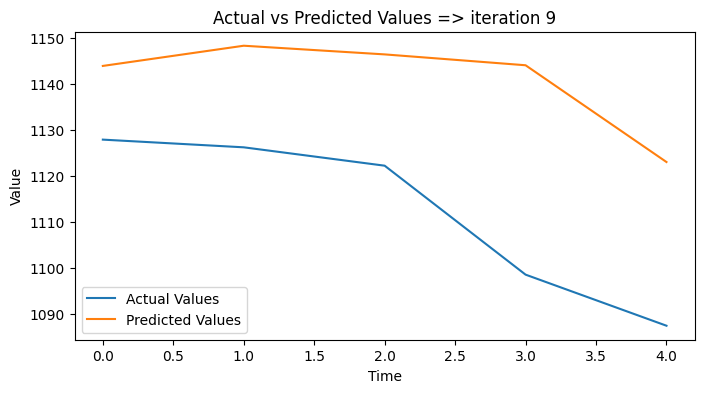

In [ ]:
# Plot the results
plt.figure(figsize=(8,4))
plt.plot(ylist, label='Actual Values')
plt.plot(true_predictions, label='Predicted Values')
plt.title('Actual vs Predicted Values => iteration 9')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt

# Split the dataset
train = dataset.iloc[:-80]
test = dataset.iloc[-80:-70]

# Scale the data
scaler = MinMaxScaler()
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

# Define the time series generator
from keras.preprocessing.sequence import TimeseriesGenerator
n_input = 5  # Increased the input sequence length
n_features = 1
train_generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=16)

# Build the model
model = Sequential()
model.add(LSTM(units=100, activation='tanh', return_sequences=True, input_shape=(n_input, n_features)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(train_generator, epochs=200, verbose=1)

# Test data generator
test_generator = TimeseriesGenerator(scaled_test, scaled_test, length=n_input, batch_size=1)

# Prepare test data for prediction
xlist, ylist = np.empty((0, n_input, n_features)), np.empty((0, 1))
for i in range(len(test_generator)):
    X, y = test_generator[i]
    xlist = np.vstack([xlist, X])
    ylist = np.vstack([ylist, y])

# Predict
ypred = model.predict(xlist)

# Inverse transform the predictions and actual values
true_predictions = scaler.inverse_transform(ypred)
ylist = scaler.inverse_transform(ylist)


Epoch 1/200
148/148 [==============================] - 5s 9ms/step - loss: 0.0128
Epoch 2/200
148/148 [==============================] - 1s 9ms/step - loss: 0.0024
Epoch 3/200
148/148 [==============================] - 2s 13ms/step - loss: 0.0028
Epoch 4/200
148/148 [==============================] - 1s 9ms/step - loss: 0.0019
Epoch 5/200
148/148 [==============================] - 1s 9ms/step - loss: 0.0019
Epoch 6/200
148/148 [==============================] - 1s 9ms/step - loss: 0.0018
Epoch 7/200
148/148 [==============================] - 1s 9ms/step - loss: 0.0021
Epoch 8/200
148/148 [==============================] - 1s 9ms/step - loss: 0.0017
Epoch 9/200
148/148 [==============================] - 1s 10ms/step - loss: 0.0019
Epoch 10/200
148/148 [==============================] - 1s 10ms/step - loss: 0.0019
Epoch 11/200
148/148 [==============================] - 2s 13ms/step - loss: 0.0015
Epoch 12/200
148/148 [==============================] - 2s 14ms/step - loss: 0.0014
Epoch 13

In [ ]:
print('new data frame ')
new_data={'Actual_values':ylist.tolist(),'Predictions':true_predictions.tolist()}
new_rows = pd.DataFrame(new_data)
df=pd.concat([df,new_rows],ignore_index=True)
df['Actual_values'] = df['Actual_values'].apply(lambda x: x[0] if isinstance(x, list) else x)
df['Predictions'] = df['Predictions'].apply(lambda x: x[0] if isinstance(x, list) else x)
df

new data frame 


,Iteration,Actual_values,Predictions
0,1,1135.675,1128.951660
1,,1147.150,1140.896484
2,,1171.525,1159.257080
3,,1165.000,1181.606323
4,,1157.075,1178.561768
5,NaN,1089.600,1080.514404
6,NaN,1087.950,1082.257812
7,NaN,1067.050,1083.662109
8,NaN,1053.900,1066.153076
9,NaN,1047.775,1058.425415


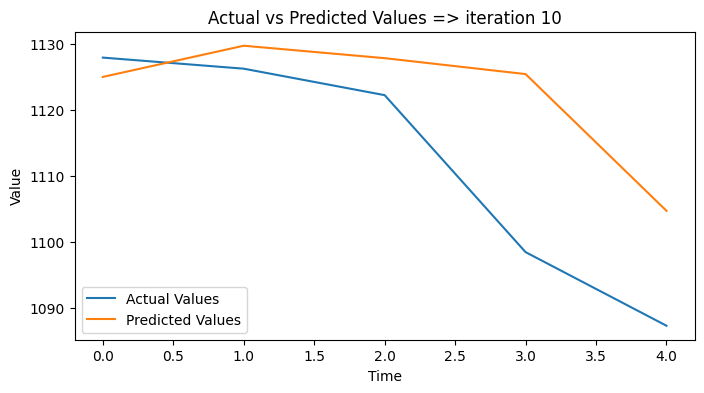

In [ ]:
# Plot the results
plt.figure(figsize=(8,4))
plt.plot(ylist, label='Actual Values')
plt.plot(true_predictions, label='Predicted Values')
plt.title('Actual vs Predicted Values => iteration 10')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt

# Split the dataset
train = dataset.iloc[:-90]
test = dataset.iloc[-90:-80]

# Scale the data
scaler = MinMaxScaler()
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

# Define the time series generator
from keras.preprocessing.sequence import TimeseriesGenerator
n_input = 5  # Increased the input sequence length
n_features = 1
train_generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=16)

# Build the model
model = Sequential()
model.add(LSTM(units=100, activation='tanh', return_sequences=True, input_shape=(n_input, n_features)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(train_generator, epochs=200, verbose=1)

# Test data generator
test_generator = TimeseriesGenerator(scaled_test, scaled_test, length=n_input, batch_size=1)

# Prepare test data for prediction
xlist, ylist = np.empty((0, n_input, n_features)), np.empty((0, 1))
for i in range(len(test_generator)):
    X, y = test_generator[i]
    xlist = np.vstack([xlist, X])
    ylist = np.vstack([ylist, y])

# Predict
ypred = model.predict(xlist)

# Inverse transform the predictions and actual values
true_predictions = scaler.inverse_transform(ypred)
ylist = scaler.inverse_transform(ylist)


Epoch 1/200
148/148 [==============================] - 6s 10ms/step - loss: 0.0160
Epoch 2/200
148/148 [==============================] - 2s 11ms/step - loss: 0.0023
Epoch 3/200
148/148 [==============================] - 2s 14ms/step - loss: 0.0024
Epoch 4/200
148/148 [==============================] - 2s 14ms/step - loss: 0.0019
Epoch 5/200
148/148 [==============================] - 1s 10ms/step - loss: 0.0024
Epoch 6/200
148/148 [==============================] - 1s 9ms/step - loss: 0.0018
Epoch 7/200
148/148 [==============================] - 1s 10ms/step - loss: 0.0020
Epoch 8/200
148/148 [==============================] - 1s 10ms/step - loss: 0.0017
Epoch 9/200
148/148 [==============================] - 1s 10ms/step - loss: 0.0018
Epoch 10/200
148/148 [==============================] - 2s 15ms/step - loss: 0.0017
Epoch 11/200
148/148 [==============================] - 2s 15ms/step - loss: 0.0018
Epoch 12/200
148/148 [==============================] - 2s 10ms/step - loss: 0.0016
Ep

In [ ]:
print('new data frame ')
new_data={'Actual_values':ylist.tolist(),'Predictions':true_predictions.tolist()}
new_rows = pd.DataFrame(new_data)
df=pd.concat([df,new_rows],ignore_index=True)
df['Actual_values'] = df['Actual_values'].apply(lambda x: x[0] if isinstance(x, list) else x)
df['Predictions'] = df['Predictions'].apply(lambda x: x[0] if isinstance(x, list) else x)
df

new data frame 


,Iteration,Actual_values,Predictions
0,1,1135.675,1128.951660
1,,1147.150,1140.896484
2,,1171.525,1159.257080
3,,1165.000,1181.606323
4,,1157.075,1178.561768
5,NaN,1089.600,1080.514404
6,NaN,1087.950,1082.257812
7,NaN,1067.050,1083.662109
8,NaN,1053.900,1066.153076
9,NaN,1047.775,1058.425415


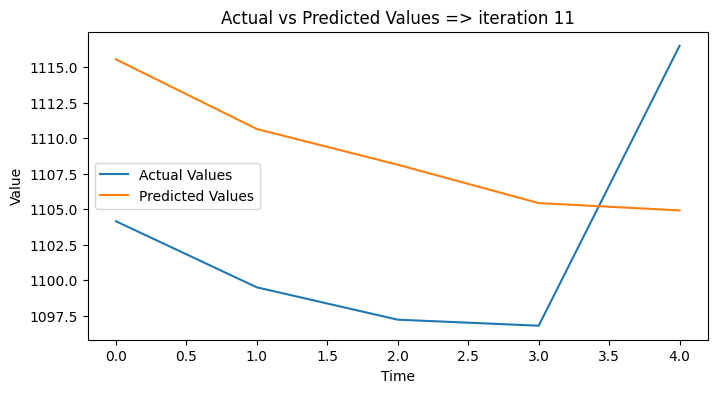

In [ ]:
# Plot the results
plt.figure(figsize=(8,4))
plt.plot(ylist, label='Actual Values')
plt.plot(true_predictions, label='Predicted Values')
plt.title('Actual vs Predicted Values => iteration 11')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt

# Split the dataset
train = dataset.iloc[:-100]
test = dataset.iloc[-100:-90]

# Scale the data
scaler = MinMaxScaler()
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

# Define the time series generator
from keras.preprocessing.sequence import TimeseriesGenerator
n_input = 5  # Increased the input sequence length
n_features = 1
train_generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=16)

# Build the model
model = Sequential()
model.add(LSTM(units=100, activation='tanh', return_sequences=True, input_shape=(n_input, n_features)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(train_generator, epochs=200, verbose=1)

# Test data generator
test_generator = TimeseriesGenerator(scaled_test, scaled_test, length=n_input, batch_size=1)

# Prepare test data for prediction
xlist, ylist = np.empty((0, n_input, n_features)), np.empty((0, 1))
for i in range(len(test_generator)):
    X, y = test_generator[i]
    xlist = np.vstack([xlist, X])
    ylist = np.vstack([ylist, y])

# Predict
ypred = model.predict(xlist)

# Inverse transform the predictions and actual values
true_predictions = scaler.inverse_transform(ypred)
ylist = scaler.inverse_transform(ylist)


Epoch 1/200
147/147 [==============================] - 5s 9ms/step - loss: 0.0138
Epoch 2/200
147/147 [==============================] - 1s 9ms/step - loss: 0.0025
Epoch 3/200
147/147 [==============================] - 1s 9ms/step - loss: 0.0023
Epoch 4/200
147/147 [==============================] - 1s 9ms/step - loss: 0.0021
Epoch 5/200
147/147 [==============================] - 2s 11ms/step - loss: 0.0024
Epoch 6/200
147/147 [==============================] - 2s 14ms/step - loss: 0.0026
Epoch 7/200
147/147 [==============================] - 1s 8ms/step - loss: 0.0018
Epoch 8/200
147/147 [==============================] - 1s 9ms/step - loss: 0.0019
Epoch 9/200
147/147 [==============================] - 1s 9ms/step - loss: 0.0016
Epoch 10/200
147/147 [==============================] - 1s 9ms/step - loss: 0.0018
Epoch 11/200
147/147 [==============================] - 1s 9ms/step - loss: 0.0014
Epoch 12/200
147/147 [==============================] - 1s 9ms/step - loss: 0.0017
Epoch 13/20

In [ ]:
print('new data frame ')
new_data={'Actual_values':ylist.tolist(),'Predictions':true_predictions.tolist()}
new_rows = pd.DataFrame(new_data)
df=pd.concat([df,new_rows],ignore_index=True)
df['Actual_values'] = df['Actual_values'].apply(lambda x: x[0] if isinstance(x, list) else x)
df['Predictions'] = df['Predictions'].apply(lambda x: x[0] if isinstance(x, list) else x)
df

new data frame 


,Iteration,Actual_values,Predictions
0,1,1135.675,1128.951660
1,,1147.150,1140.896484
2,,1171.525,1159.257080
3,,1165.000,1181.606323
4,,1157.075,1178.561768
5,NaN,1089.600,1080.514404
6,NaN,1087.950,1082.257812
7,NaN,1067.050,1083.662109
8,NaN,1053.900,1066.153076
9,NaN,1047.775,1058.425415


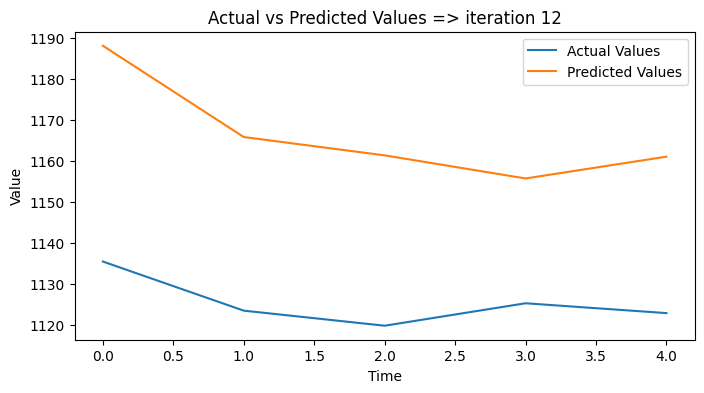

In [ ]:
# Plot the results
plt.figure(figsize=(8,4))
plt.plot(ylist, label='Actual Values')
plt.plot(true_predictions, label='Predicted Values')
plt.title('Actual vs Predicted Values => iteration 12')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt

# Split the dataset
train = dataset.iloc[:-110]
test = dataset.iloc[-110:-100]

# Scale the data
scaler = MinMaxScaler()
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

# Define the time series generator
from keras.preprocessing.sequence import TimeseriesGenerator
n_input = 5  # Increased the input sequence length
n_features = 1
train_generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=16)

# Build the model
model = Sequential()
model.add(LSTM(units=100, activation='tanh', return_sequences=True, input_shape=(n_input, n_features)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(train_generator, epochs=200, verbose=1)

# Test data generator
test_generator = TimeseriesGenerator(scaled_test, scaled_test, length=n_input, batch_size=1)

# Prepare test data for prediction
xlist, ylist = np.empty((0, n_input, n_features)), np.empty((0, 1))
for i in range(len(test_generator)):
    X, y = test_generator[i]
    xlist = np.vstack([xlist, X])
    ylist = np.vstack([ylist, y])

# Predict
ypred = model.predict(xlist)

# Inverse transform the predictions and actual values
true_predictions = scaler.inverse_transform(ypred)
ylist = scaler.inverse_transform(ylist)


Epoch 1/200
146/146 [==============================] - 6s 13ms/step - loss: 0.0179
Epoch 2/200
146/146 [==============================] - 2s 13ms/step - loss: 0.0029
Epoch 3/200
146/146 [==============================] - 1s 9ms/step - loss: 0.0026
Epoch 4/200
146/146 [==============================] - 1s 9ms/step - loss: 0.0024
Epoch 5/200
146/146 [==============================] - 1s 9ms/step - loss: 0.0027
Epoch 6/200
146/146 [==============================] - 1s 9ms/step - loss: 0.0021
Epoch 7/200
146/146 [==============================] - 1s 9ms/step - loss: 0.0023
Epoch 8/200
146/146 [==============================] - 1s 9ms/step - loss: 0.0030
Epoch 9/200
146/146 [==============================] - 1s 9ms/step - loss: 0.0023
Epoch 10/200
146/146 [==============================] - 2s 11ms/step - loss: 0.0021
Epoch 11/200
146/146 [==============================] - 2s 13ms/step - loss: 0.0020
Epoch 12/200
146/146 [==============================] - 1s 10ms/step - loss: 0.0017
Epoch 13

In [ ]:
print('new data frame ')
new_data={'Actual_values':ylist.tolist(),'Predictions':true_predictions.tolist()}
new_rows = pd.DataFrame(new_data)
df=pd.concat([df,new_rows],ignore_index=True)
df['Actual_values'] = df['Actual_values'].apply(lambda x: x[0] if isinstance(x, list) else x)
df['Predictions'] = df['Predictions'].apply(lambda x: x[0] if isinstance(x, list) else x)
df

new data frame 


,Iteration,Actual_values,Predictions
0,1,1135.675,1128.951660
1,,1147.150,1140.896484
2,,1171.525,1159.257080
3,,1165.000,1181.606323
4,,1157.075,1178.561768
...,...,...,...
60,NaN,1071.800,1024.839355
61,NaN,1092.200,1046.840454
62,NaN,1124.750,1066.464722
63,NaN,1144.325,1096.753784


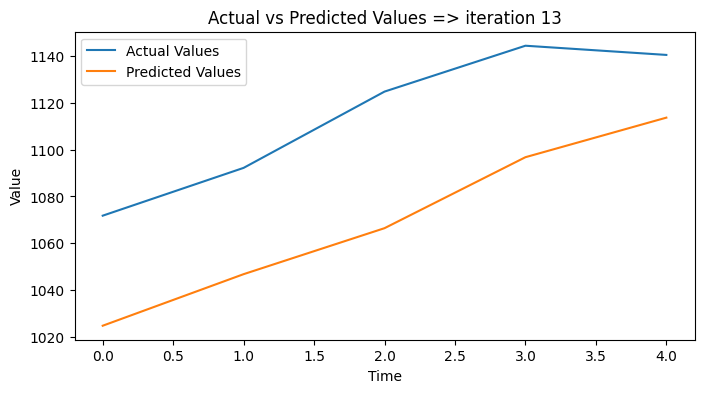

In [ ]:
# Plot the results
plt.figure(figsize=(8,4))
plt.plot(ylist, label='Actual Values')
plt.plot(true_predictions, label='Predicted Values')
plt.title('Actual vs Predicted Values => iteration 13')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt

# Split the dataset
train = dataset.iloc[:-120]
test = dataset.iloc[-120:-110]

# Scale the data
scaler = MinMaxScaler()
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

# Define the time series generator
from keras.preprocessing.sequence import TimeseriesGenerator
n_input = 5  # Increased the input sequence length
n_features = 1
train_generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=16)

# Build the model
model = Sequential()
model.add(LSTM(units=100, activation='tanh', return_sequences=True, input_shape=(n_input, n_features)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(train_generator, epochs=200, verbose=1)

# Test data generator
test_generator = TimeseriesGenerator(scaled_test, scaled_test, length=n_input, batch_size=1)

# Prepare test data for prediction
xlist, ylist = np.empty((0, n_input, n_features)), np.empty((0, 1))
for i in range(len(test_generator)):
    X, y = test_generator[i]
    xlist = np.vstack([xlist, X])
    ylist = np.vstack([ylist, y])

# Predict
ypred = model.predict(xlist)

# Inverse transform the predictions and actual values
true_predictions = scaler.inverse_transform(ypred)
ylist = scaler.inverse_transform(ylist)


Epoch 1/200
146/146 [==============================] - 7s 12ms/step - loss: 0.0233
Epoch 2/200
146/146 [==============================] - 1s 9ms/step - loss: 0.0033
Epoch 3/200
146/146 [==============================] - 1s 9ms/step - loss: 0.0026
Epoch 4/200
146/146 [==============================] - 1s 9ms/step - loss: 0.0024
Epoch 5/200
146/146 [==============================] - 1s 9ms/step - loss: 0.0027
Epoch 6/200
146/146 [==============================] - 1s 9ms/step - loss: 0.0026
Epoch 7/200
146/146 [==============================] - 1s 9ms/step - loss: 0.0024
Epoch 8/200
146/146 [==============================] - 1s 9ms/step - loss: 0.0022
Epoch 9/200
146/146 [==============================] - 2s 13ms/step - loss: 0.0025
Epoch 10/200
146/146 [==============================] - 2s 13ms/step - loss: 0.0020
Epoch 11/200
146/146 [==============================] - 1s 9ms/step - loss: 0.0024
Epoch 12/200
146/146 [==============================] - 1s 9ms/step - loss: 0.0018
Epoch 13/2

In [ ]:
print('new data frame ')
new_data={'Actual_values':ylist.tolist(),'Predictions':true_predictions.tolist()}
new_rows = pd.DataFrame(new_data)
df=pd.concat([df,new_rows],ignore_index=True)
df['Actual_values'] = df['Actual_values'].apply(lambda x: x[0] if isinstance(x, list) else x)
df['Predictions'] = df['Predictions'].apply(lambda x: x[0] if isinstance(x, list) else x)
df

new data frame 


,Iteration,Actual_values,Predictions
0,1,1135.675,1128.951660
1,,1147.150,1140.896484
2,,1171.525,1159.257080
3,,1165.000,1181.606323
4,,1157.075,1178.561768
...,...,...,...
65,NaN,1045.000,1026.740479
66,NaN,1043.400,1040.721069
67,NaN,1017.450,1037.264648
68,NaN,987.875,1017.900574


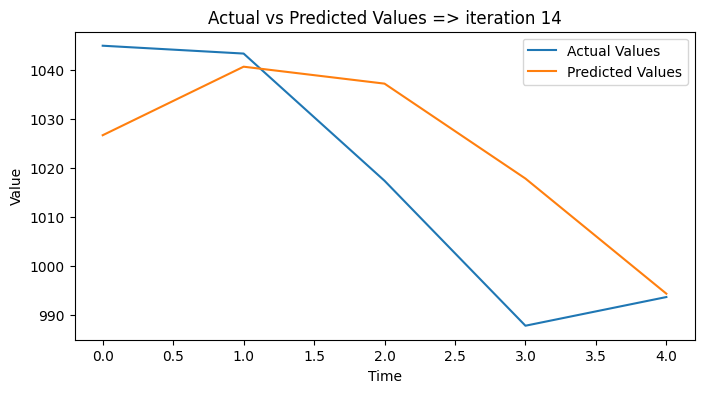

In [ ]:
# Plot the results
plt.figure(figsize=(8,4))
plt.plot(ylist, label='Actual Values')
plt.plot(true_predictions, label='Predicted Values')
plt.title('Actual vs Predicted Values => iteration 14')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt

# Split the dataset
train = dataset.iloc[:-130]
test = dataset.iloc[-130:-120]

# Scale the data
scaler = MinMaxScaler()
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

# Define the time series generator
from keras.preprocessing.sequence import TimeseriesGenerator
n_input = 5  # Increased the input sequence length
n_features = 1
train_generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=16)

# Build the model
model = Sequential()
model.add(LSTM(units=100, activation='tanh', return_sequences=True, input_shape=(n_input, n_features)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(train_generator, epochs=200, verbose=1)

# Test data generator
test_generator = TimeseriesGenerator(scaled_test, scaled_test, length=n_input, batch_size=1)

# Prepare test data for prediction
xlist, ylist = np.empty((0, n_input, n_features)), np.empty((0, 1))
for i in range(len(test_generator)):
    X, y = test_generator[i]
    xlist = np.vstack([xlist, X])
    ylist = np.vstack([ylist, y])

# Predict
ypred = model.predict(xlist)

# Inverse transform the predictions and actual values
true_predictions = scaler.inverse_transform(ypred)
ylist = scaler.inverse_transform(ylist)


Epoch 1/200
145/145 [==============================] - 7s 10ms/step - loss: 0.0143
Epoch 2/200
145/145 [==============================] - 1s 9ms/step - loss: 0.0030
Epoch 3/200
145/145 [==============================] - 1s 10ms/step - loss: 0.0034
Epoch 4/200
145/145 [==============================] - 1s 10ms/step - loss: 0.0023
Epoch 5/200
145/145 [==============================] - 1s 10ms/step - loss: 0.0023
Epoch 6/200
145/145 [==============================] - 1s 9ms/step - loss: 0.0022
Epoch 7/200
145/145 [==============================] - 2s 13ms/step - loss: 0.0023
Epoch 8/200
145/145 [==============================] - 2s 14ms/step - loss: 0.0028
Epoch 9/200
145/145 [==============================] - 1s 9ms/step - loss: 0.0019
Epoch 10/200
145/145 [==============================] - 1s 10ms/step - loss: 0.0019
Epoch 11/200
145/145 [==============================] - 1s 9ms/step - loss: 0.0023
Epoch 12/200
145/145 [==============================] - 1s 10ms/step - loss: 0.0019
Epoch

In [ ]:
print('new data frame ')
new_data={'Actual_values':ylist.tolist(),'Predictions':true_predictions.tolist()}
new_rows = pd.DataFrame(new_data)
df=pd.concat([df,new_rows],ignore_index=True)
df['Actual_values'] = df['Actual_values'].apply(lambda x: x[0] if isinstance(x, list) else x)
df['Predictions'] = df['Predictions'].apply(lambda x: x[0] if isinstance(x, list) else x)
df

new data frame 


,Iteration,Actual_values,Predictions
0,1,1135.675,1128.951660
1,,1147.150,1140.896484
2,,1171.525,1159.257080
3,,1165.000,1181.606323
4,,1157.075,1178.561768
...,...,...,...
70,NaN,978.575,993.940125
71,NaN,983.175,978.166138
72,NaN,988.700,984.673462
73,NaN,1005.600,985.964783


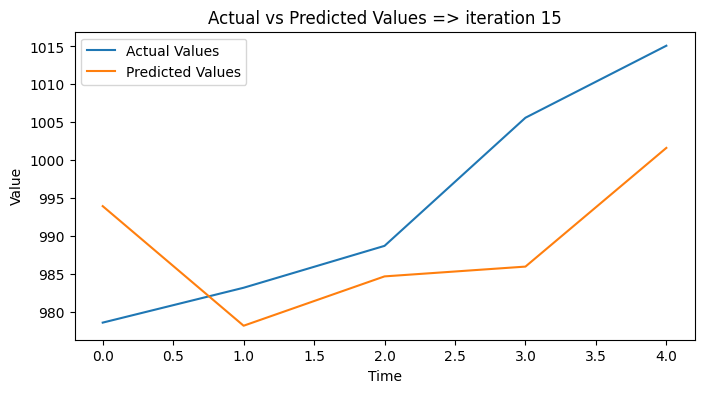

In [ ]:
# Plot the results
plt.figure(figsize=(8,4))
plt.plot(ylist, label='Actual Values')
plt.plot(true_predictions, label='Predicted Values')
plt.title('Actual vs Predicted Values => iteration 15')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

In [ ]:
df['Iteration'] = df['Iteration'].fillna(0)
file_name = 'LSTM_tanh.xlsx'
df.to_excel(file_name)
print('DataFrame is written to Excel File successfully.')

DataFrame is written to Excel File successfully.
